In [3]:
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [70]:
class BilateralFilter(object):
    
    def __init__(self,img,kernel_size,sigma_s,sigma_i):
        self.img = img
        self.kernel_size = int(kernel_size/2)
        self.sigma_s = sigma_s
        self.sigma_i = sigma_i
        print("Bilateral Kernel is ready!")
    
    #Computing spatial distance
    def computeSpatialDistance(self,i,j,u,v):
        #print(i,j,u,v)
        spatial_d = np.sqrt(((i-u)**2)+((j-v)**2))
        #print(spatial_d)
        return spatial_d
    
    #Computing intensity distance
    def computeIntensityDistance(self,i,j,u,v):
        intensity_d = (self.img[i][j]-self.img[u][v])
        return intensity_d
    
    # Implementing gausian Function
    def gausianFunction(self,x, sigma):
        g_d = np.exp((-(np.square(x)))/(2*np.square(sigma)))
        a = 1/(2*np.pi*np.square(sigma))
        ans = a*g_d
        #print(ans)
        return ans
    
    #checking if the pixel exists
    def isPixelexists(self,a,b):
        r,c = self.img.shape
        #print(r,c)
        if (a>=0 and a<r) and (b>=0 and b<c) :
            return True
        else:
            return False

    #Computing 4 buffer values.TOP,BOTTOM,LEFT and RIGHT
    
    def get_topSpatialBuffer(self,u,v):
        topSpatial_buffer = []
        topSpatial_buffer_imgwt = []

        for p in range(1,self.kernel_size+1):
                    
            x = u-p
            for m in range(-p,p+1):
                
                y = v+m
                #print(x,y)
                ans = self.gausianFunction(self.computeSpatialDistance(u,v,x,y),self.sigma_s)
                topSpatial_buffer.append(ans)
                if self.isPixelexists(x,y):
                    topSpatial_buffer_imgwt.append(ans*self.img[x,y])

                else:
                    topSpatial_buffer_imgwt.append(0)

        return topSpatial_buffer,topSpatial_buffer_imgwt

    def get_bottomSpatialBuffer(self,u,v):
        
        bottomSpatial_buffer = []
        bottomSpatial_buffer_imgwt = []
        
        for p in range(1,self.kernel_size+1):
            
            x = u+p
            for m in range(-p,p+1):
                y = v+m
                #print(x,y)
                ans = self.gausianFunction(self.computeSpatialDistance(u,v,x,y),self.sigma_s)
                bottomSpatial_buffer.append(ans)
                if self.isPixelexists(x,y):
                    bottomSpatial_buffer_imgwt.append(ans*self.img[x,y])
                else:
                    bottomSpatial_buffer_imgwt.append(0)

        return bottomSpatial_buffer, bottomSpatial_buffer_imgwt

    def get_leftSpatialBuffer(self,u,v):
        leftSpatial_buffer = []
        leftSpatial_buffer_imgwt = []
        
        for p in range(1,self.kernel_size+1):
            y = v-p
            for m in range(-p,p+1):
                x = u+m
                #print(x,y)
                ans = self.gausianFunction(self.computeSpatialDistance(u,v,x,y),self.sigma_s)
                leftSpatial_buffer.append(ans)
                if self.isPixelexists(x,y):
                    leftSpatial_buffer_imgwt.append(ans*self.img[x,y])
                else:
                    leftSpatial_buffer_imgwt.append(0)
                

        return leftSpatial_buffer, leftSpatial_buffer_imgwt

    def get_rightSpatialBuffer(self,u,v):
        
        rightSpatial_buffer = []
        rightSpatial_buffer_imgwt = []
        
        for p in range(1,self.kernel_size+1):
            y = v+p
            for m in range(-p,p+1):
                x = u+m
                #print(x,y)
                ans = self.gausianFunction(self.computeSpatialDistance(u,v,x,y),self.sigma_s)
                rightSpatial_buffer.append(ans)
                if self.isPixelexists(x,y):
                    rightSpatial_buffer_imgwt.append(ans*self.img[x,y])
                else:
                    rightSpatial_buffer_imgwt.append(0)
                
        return rightSpatial_buffer,rightSpatial_buffer_imgwt
    
    

    ##############################################################################
    def get_topIntensityBuffer(self,u,v):
        topIntensity_buffer = []

        for p in range(1,self.kernel_size+1):
                    
            x = u-p
            for m in range(-p,p+1):
                
                y = v+m
                #print(x,y)
                
                if self.isPixelexists(x,y):
                    #print("Found")
                    topIntensity_buffer.append(self.gausianFunction(self.computeIntensityDistance(u,v,x,y),self.sigma_i))
                else:
                    #print("Not found")
                    topIntensity_buffer.append(self.gausianFunction(self.img[u][v],self.sigma_i))

        return topIntensity_buffer

    def get_bottomIntensityBuffer(self,u,v):
        bottomIntensity_buffer = []
        
        for p in range(1,self.kernel_size+1):
            
            x = u+p
            for m in range(-p,p+1):
                y = v+m
                #print(x,y)
                
                if self.isPixelexists(x,y):
                    #print("Found")
                    bottomIntensity_buffer.append(self.gausianFunction(self.computeIntensityDistance(u,v,x,y),
                                                                       self.sigma_i))
                else:
                    #print("Not found")
                    bottomIntensity_buffer.append(self.gausianFunction(self.img[u][v],self.sigma_i))

        return bottomIntensity_buffer

    def get_leftIntensityBuffer(self,u,v):
        leftIntensity_buffer = []
        
        for p in range(1,self.kernel_size+1):
            y = v-p
            for m in range(-p,p+1):
                x = u+m
                #print(x,y)
                
                if self.isPixelexists(x,y):
                    #print("Found")
                    leftIntensity_buffer.append(self.gausianFunction(self.computeIntensityDistance(u,v,x,y),self.sigma_i))
                else:
                    #print("Not found")
                    leftIntensity_buffer.append(self.gausianFunction(self.img[u][v],self.sigma_i))

        return leftIntensity_buffer

    def get_rightIntensityBuffer(self,u,v):
        rightIntensity_buffer = []
        
        for p in range(1,self.kernel_size+1):
            y = v+p
            for m in range(-p,p+1):
                x = u+m
                #print(x,y)
                
                if self.isPixelexists(x,y):
                    #print("Found")
                    rightIntensity_buffer.append(self.gausianFunction(self.computeIntensityDistance(u,v,x,y),self.sigma_i))
                else:
                    #print("Not found")
                    rightIntensity_buffer.append(self.gausianFunction(self.img[u][v],self.sigma_i))

        return rightIntensity_buffer

    
    def computeBilateralWeight(self):
        #Computing spatial and intensity distance.
        #Bilateral_Weight = f(p-s)*g(ip-is)*ip
        
        bilateral_weight = []
        #noise_data = []
        print("Computing Spatial and Intensity distances..")
        
        rows = self.img.shape[0]
        cols = self.img.shape[1]
        
        
        
        for d in tqdm(range(0, rows * cols)):
     
            # Find row and column index
            i = d // cols
            j = d % cols
                
            if self.img[i,j] != 0:
                pass
            
                #print("hello")
                win_topIntensity_buffer = self.get_topIntensityBuffer(i,j)
                win_bottomIntensity_buffer = self.get_bottomIntensityBuffer(i,j)
                win_leftIntensity_buffer = self.get_leftIntensityBuffer(i,j)
                win_rightIntensity_buffer = self.get_rightIntensityBuffer(i,j)
                
                
                Intensity_buffer = np.array(

                    [win_topIntensity_buffer,win_bottomIntensity_buffer,win_leftIntensity_buffer,
                     win_rightIntensity_buffer]

                )
                
                win_topSpatial_buffer,win_topSpatial_buffer_imgwt = self.get_topSpatialBuffer(i,j)
                win_bottomSpatial_buffer,win_bottomSpatial_buffer_imgwt = self.get_bottomSpatialBuffer(i,j)
                win_leftSpatial_buffer,win_leftSpatial_buffer_imgwt = self.get_leftSpatialBuffer(i,j)
                win_rightSpatial_buffer,win_rightSpatial_buffer_imgwt = self.get_rightSpatialBuffer(i,j)

                Spatial_buffer = np.array(

                            [win_topSpatial_buffer,win_bottomSpatial_buffer,win_leftSpatial_buffer,
                             win_rightSpatial_buffer]

                )
                Spatial_buffer_imgwt = np.array(

                            [win_topSpatial_buffer_imgwt,win_bottomSpatial_buffer_imgwt,win_leftSpatial_buffer_imgwt,
                             win_rightSpatial_buffer_imgwt]

                )
                
                #print(Intensity_buffer)
                #print(Spatial_buffer)
                spatialIntensity_CombinedWeight = Intensity_buffer*Spatial_buffer
                finalCombined_weight = Intensity_buffer*Spatial_buffer_imgwt
                #print((spatialIntensity_CombinedWeight))
                final_weight_w = sum(sum(spatialIntensity_CombinedWeight))
                final_weight_bilateral = sum(sum(finalCombined_weight))
                #print(final_weight)
                
                
                bilateral_weight.append(
                    
                    #(self.gausianFunction(self.img[i,j],Spatial_buffer.std())*
                    #self.gausianFunction(self.img[i,j],Intensity_buffer.std()))*
                        #((self.img[i,j]-Spatial_buffer.mean())/Spatial_buffer.std())*
                     #(self.img[i,j] - Intensity_buffer.mean())/Intensity_buffer.std())*
                    #((self.img[i,j] - spatial_weight.mean())/spatial_weight.std())
                    #self.gausianFunction(self.img[i,j],spatial_weight.std())
                    #spatial_weight.std()
                    final_weight_bilateral/final_weight_w
                    #np.array([self.gausianFunction(i,spatial_weight.std()) for i in spatial_weight]).mean()
                )
                #noise_data.append((guard_buffer.mean()))
            
            else:
                    
                bilateral_weight.append(0)
                #noise_data.append(0)
            #print(Spatial_buffer)       
            
        print(len(bilateral_weight))
        bilateral_weight = np.array(bilateral_weight).reshape(self.img.shape)
        #noise_data = (np.array(noise_data))
        #P = np.array(self.compute_scaleFactor()*noise_data).reshape(self.img.shape)
        print("Process completed,Bilateral Filtered Image succesfully Computed.\n")
        return bilateral_weight

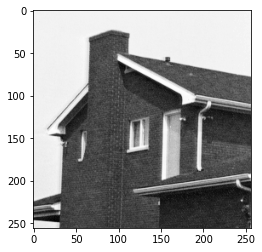

In [71]:
#arr = np.array(np.arange(250*250)).reshape(250,250)
arr = plt.imread('test.tiff')[:,:,2]
plt.imshow(arr,cmap='gray')
plt.imsave('testImg.png',arr,cmap='gray',vmax=255,vmin=0)

In [72]:
arr

array([[222, 222, 222, ..., 224, 225, 223],
       [222, 223, 222, ..., 225, 225, 225],
       [221, 222, 222, ..., 225, 225, 225],
       ...,
       [214, 216, 217, ...,  89,  72, 144],
       [215, 217, 215, ...,  99,  84, 156],
       [216, 218, 214, ..., 108,  83, 157]], dtype=uint8)

In [73]:
bf = BilateralFilter(arr,3,12,16)

Bilateral Kernel is ready!


In [74]:
bf_w = bf.computeBilateralWeight()

Computing Spatial and Intensity distances..


/home/h_mittal/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in ubyte_scalars



65536
Process completed,Bilateral Filtered Image succesfully Computed.



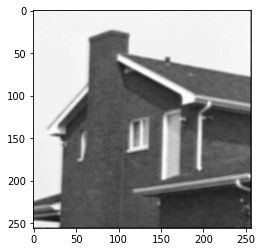

In [75]:
plt.imshow(bf_w,cmap='gray')
#plt.imsave('bf_kernel11.png',bf_w,cmap='gray',vmax=255,vmin=0)

In [76]:
bf_w

array([[ 76.09731096, 121.27091139, 125.79765541, ..., 151.03816665,
        133.41042399,  81.11543286],
       [125.60290661, 221.83433781, 222.35421435, ..., 224.54840588,
        224.32532263, 129.07622492],
       [146.90884587, 221.77459495, 222.35421435, ..., 224.61626725,
        224.88247549, 134.03346351],
       ...,
       [147.96443598, 215.7514337 , 216.61751728, ...,  82.55996813,
        114.98380357,  62.53780544],
       [140.38736238, 215.40399355, 216.59600645, ...,  85.08003607,
        116.12699141,  54.16989358],
       [ 78.2624551 , 141.04766851, 147.84517203, ...,  53.22819257,
         75.24069587,  33.31231872]])

In [21]:
l = np.array([1,2,3,4])
n = np.array([0.1,0.2,0.3,0.4])
b = 2

ans = l*n*b
print(ans)
print(sum(ans))

[0.2 0.8 1.8 3.2]
6.0
